In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['CUDA_VISIBLE_DEVICES']='0'
#cuda ile 0 numarali yani ilk gpu kullanılmasi icin import ediliyor.


from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import lxml.html
from tabulate import tabulate
from sklearn.linear_model import LinearRegression as lr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import statsmodels.api as sm


from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2385282281576523604
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1459018137
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7020962820072694734
physical_device_desc: "device: 0, name: GeForce 940MX, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [7]:
allData=pd.read_csv('corona-dataset-Turkey.csv', encoding='unicode_escape')
allData = allData.loc[:, ~allData.columns.str.contains('^Unnamed')]
allData

,date,dailyTest,dailyEvent,dailyDecease,totalHealing,dailyHealing,IntensiveCare,intubatedPatient,sociability,highestTemperature,lowestTemperature
0,20200313,6,5,0,0,0,0,0,1,7,3
1,20200314,8,6,0,0,0,0,0,1,7,3
2,20200315,11,7,0,0,0,0,0,1,6,0
3,20200316,35,31,0,0,0,0,0,1,6,1
4,20200317,63,49,1,0,0,0,0,1,6,0
5,20200318,150,93,1,0,0,0,0,1,7,2
6,20200319,1981,168,2,0,0,0,0,1,9,3
7,20200320,3656,311,5,0,0,0,0,1,8,3
8,20200321,2970,277,12,0,0,0,0,1,10,4
9,20200322,1738,289,9,0,0,0,0,1,10,3


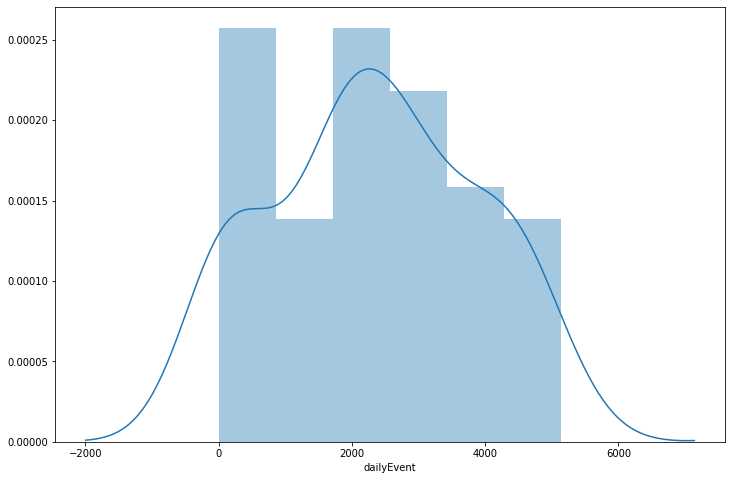

In [8]:
plt.figure(figsize=(12,8))
X = allData.drop(['dailyEvent'], axis=1)
y = allData['dailyEvent']
sns.distplot(y)
plt.show()

In [11]:
X = X[['dailyTest', 'dailyDecease', 'totalHealing', 'dailyHealing', 'IntensiveCare','intubatedPatient', 'sociability', 'highestTemperature', 'lowestTemperature']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lm = LinearRegression() 
lm.fit(X_train, y_train)
print("R score: {0}".format(round(lm.score(X_train, y_train),2)))
print("Intercept: {0}".format(round(lm.intercept_),))
pd.DataFrame({'feature':X.columns, 'coef':lm.coef_})

R score: 0.93
Intercept: 57.0


,coef,feature
0,0.060010,dailyTest
1,-24.416381,dailyDecease
2,-0.014825,totalHealing
3,-0.193229,dailyHealing
4,2.112108,IntensiveCare
5,1.522059,intubatedPatient
6,236.179957,sociability
7,49.239915,highestTemperature
8,-155.322427,lowestTemperature


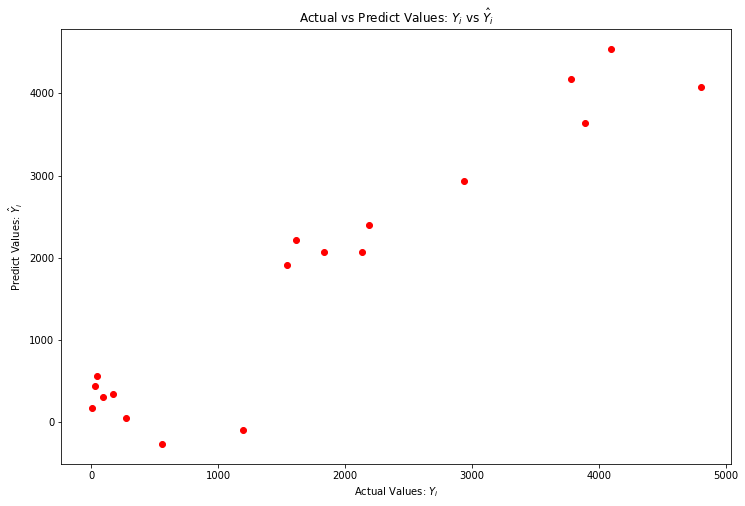

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, lm.predict(X_test), color='r')
plt.xlabel("Actual Values: $Y_i$")
plt.ylabel("Predict Values: $\hat{Y}_i$")
plt.title("Actual vs Predict Values: $Y_i$ vs $\hat{Y}_i$")
plt.show()

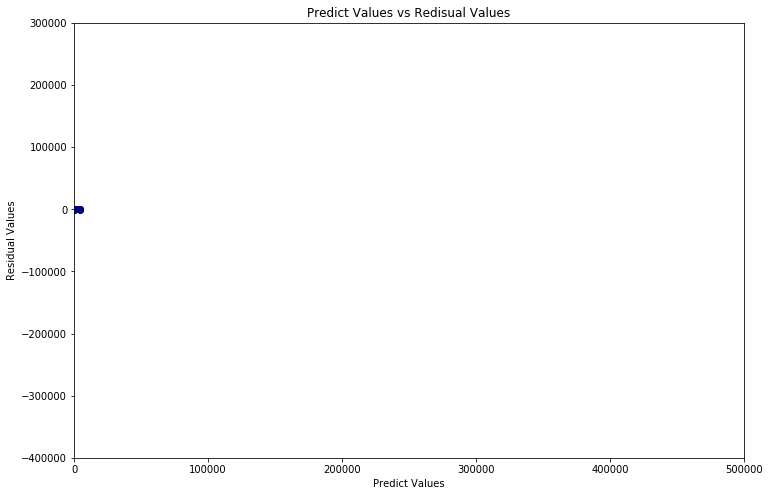

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c = 'navy')
plt.xlabel('Predict Values')
plt.ylabel('Residual Values')
plt.title('Predict Values vs Redisual Values')
plt.xlim(0,500000)
plt.ylim(-400000,300000)
plt.show()

In [14]:
mae = mean_absolute_error(lm.predict(X_test), y_test)
mse = mean_squared_error(lm.predict(X_test), y_test)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 395.98
Mean Squared Error (MSE): 250125.62
Root Mean Squared Error (RMSE): 500.13


In [15]:
model = sm.OLS(y_train, X_train).fit()
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

model.summary()

Mean Absolute Error (MAE): 395.98
Mean Squared Error (MSE): 250125.62
Root Mean Squared Error (RMSE): 500.13


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             dailyEvent   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              224.5
Date:                Fri, 15 May 2020   Prob (F-statistic):                    2.58e-26
Time:                        11:20:50   Log-Likelihood:                         -300.79
No. Observations:                  41   AIC:                                      619.6
Df Residuals:                      32   BIC:                                      635.0
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
dailyTest              0.0603      0.023      2.673      0.012       0.014       0.106
dailyDecease         -24.6424     11.429     -2.156      0.039     -47.922      -1.363
totalHealing          -0.0150      0.008     -1.824      0.077      -0.032       0.002
dailyHealing          -0.1950      0.103     -1.899      0.067      -0.404       0.014
IntensiveCare          2.1261      0.645      3.296      0.002       0.812       3.440
intubatedPatient       1.5143      0.573      2.643      0.013       0.347       2.681
sociability          245.3982    156.191      1.571      0.126     -72.752     563.548
highestTemperature    55.1026     39.207      1.405      0.170     -24.760     134.966
lowestTemperature   -159.0364     80.265     -1.981      0.056    -322.530       4.458
==============================================================================
Omnibus:                        0.932   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.243
Skew:                           0.000   Prob(JB):                        0.886
Kurtosis:                       3.377   Cond. No.                     9.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""